In [1]:
import imblearn
print(imblearn.__version__)

0.9.0


In [2]:
from sklearn.datasets import make_classification

In [3]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

In [5]:
from collections import Counter

In [6]:
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


In [15]:
import matplotlib.pyplot as plt

In [11]:
counter.items()

dict_items([(0, 9900), (1, 100)])

In [12]:
X[0]

array([0.22201371, 0.54020654])

In [42]:
from numpy import where

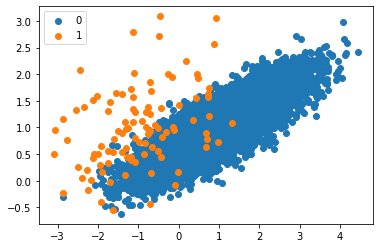

In [43]:
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

# To use SMOTE

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
smt = SMOTE()
X_new, y_new = smt.fit_resample(X, y)

In [22]:
counter = Counter(y_new)
print(counter)

Counter({0: 9900, 1: 9900})


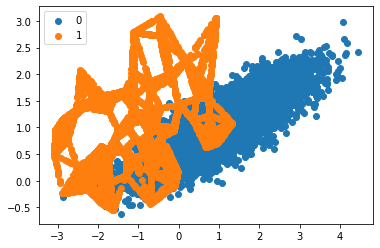

In [44]:
for label, _ in counter.items():
    row_ix = where(y_new == label)[0]
    pyplot.scatter(X_new[row_ix, 0], X_new[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

The original paper on SMOTE suggested combining SMOTE with random undersampling of the majority class.

In [27]:
from imblearn.under_sampling import RandomUnderSampler

In [28]:
smt1 = SMOTE(sampling_strategy=0.1) #10% of data points with majority class
undersample = RandomUnderSampler(sampling_strategy=0.5) # minority class가 majority의 50%가 되도록

In [30]:
X_new1, y_new1 = smt1.fit_resample(X, y)

In [31]:
counter = Counter(y_new1)
print(counter)
# 10%

Counter({0: 9900, 1: 990})


In [32]:
X_new2, y_new2 = undersample.fit_resample(X_new1, y_new1)

In [33]:
counter = Counter(y_new2)
print(counter)

Counter({0: 1980, 1: 990})


# Borderline SMOTE

In [34]:
from imblearn.over_sampling import BorderlineSMOTE

In [39]:
bdsmt = BorderlineSMOTE()
X_border, y_border = bdsmt.fit_resample(X, y)

In [40]:
counter = Counter(y_border)
print(counter)

Counter({0: 9900, 1: 9900})


# ADASYN

In [37]:
from imblearn.over_sampling import ADASYN

In [38]:
adasyn = ADASYN()
X_ads, y_ads = adasyn.fit_resample(X, y)

In [41]:
counter = Counter(y_ads)
print(counter)

Counter({0: 9900, 1: 9899})


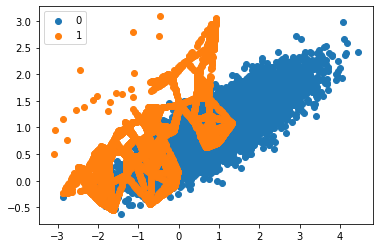

In [46]:
for label, _ in counter.items():
    row_ix = where(y_ads == label)[0]
    pyplot.scatter(X_ads[row_ix, 0], X_ads[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()